# IMPORTANT
This notebook runs off of the kernel for the Data_Cleaning notebook, you MUST run all cells in that notebook before running this notebook and connect the Kernels.

## Final Project Submission

Please fill out:
* Student name: Sunny Liu, Brendan Polke, Colby Gates
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Praveen Gowtham
* Blog post URL: 

# Making Millions at the Box Office

# Goals

The goal of this project was to come up with three concrete recomendations for a company trying to enter into the movie industry based on the movies doing the best at the Box Office.



To answer this question we will parse the relevant data and isolate variables that contribute most to box office success.

# Data

The data we just in our analysis comes from Box Office Mojo (csv), IMDB (sql database) and The Numbers (csv). We converted these files to pandas dataframes and cleaned and sorted through data using python and pandas code in the Data_Cleaning notebook.

# Methods

## Budget and Evaluation Metric

Before discussing the relevant variables we found that may contribute to box office success it is important to understand the metric that we are using to quantify box office success. At first glance it may have been easy to just look at domestic gross totals, foreign gross totals and worldwide grossing totals but this does not account for the money spent getting the movie to the box office. For example a movie that grosses a hundred million dollars worldwide but had a production budget of ninty million has a much lower return on investment then a movie that grosses fifty million dollars but only cost ten million to make. Because of this we decided to create three metrics that we defined as domestic success, foreign success and worldwide success by taking the gross of each market (domestic, foreign and worldwide) and dividing it by the production budget. In doing so we created a standardized metric comparable across all movies no matter the budget. If this new metric was greater then 1 it meant that the movies made more money then they spent, i.e the larger the number the more profitable compared to the budget the movie was.

## Additional Metrics

## Budget

One of the first variables we chose to examine was the budget of a given movie. It felt clear to us that not all movies are made equal. A hundred million dollar movie and the variables influencing it's success feels much different then a fifty thousand dollar movie. After a little bit of outside research on industry standards we decided to split movies into three categories: low budget movies, mid budget movies and high budget movies. We defined low budget movies as movies with a production budget less then five million dollars. Mid budget movies are defined as movies with a budget between five and fifty million dollars and high budget movies with budgets greater then fifty million dollars.

## Runtime

The next metric we looked at was the runtime of movies. Movies these days can range any where from forty five minutes to the new trend of the three plus hour movie. Is there a sweet spot for profitable movies? Are people more likely to spend the money to watch to movie if it's short and sweet? Or are they more likely to gravitate towards the longer movie because they want the most bang for their buck? In an attempt to answer these questions we ran analysis on the runtime of movies compared to the ROI to see if we could gain any insight.

## Genre

Another metric we choose to examine was the genre of movie. It is not unusual for someone to look at the genre of a movie and either immediately decide they don't want to watch it (rom com or horror movie maybe), while there are other genres where people gravitate towards. Is this an individual trend or are there larger trends in the types of movies people enjoy? Is there a particular genre of movie that does the best at the box office? Are there certain genres you want to avoid when making a movie? 

## Personel

The last metric we choose to look at was specific personel and how certain writers, producers and actors might effect box office outcomes of movies. There are certain people whom, if they see that perhaps Brad Pitt is in a movie will watch it no matter what. Are there certain individuals with the midas touch where every movie they participate in seems to be a success? 

# Results

## Budget

After dividing films into our three categories of low, medium and high budget films we looked at descriptive statistics across these three categories to see if there are signifigant differences between them. Below is code that creates a table of descritive statistics for each bidget level 

In [8]:
low_budget.describe().iloc[:,-3:]

,domestic_success,foreign_success,WW_success
count,1104.000000,76.000000,1104.000000
mean,9.171927,7.435801,13.057042
std,59.100067,24.142682,66.335127
min,0.000000,0.004550,0.000026
25%,0.075408,0.289624,0.212978
50%,0.941282,1.833333,1.686642
75%,4.895456,4.452778,7.058571
max,1800.000000,202.000000,1800.000000


In [9]:
mid_budget.describe().iloc[:,-3:]

,domestic_success,foreign_success,WW_success
count,2975.000000,592.000000,2975.000000
mean,1.743540,1.748970,3.072227
std,2.633854,2.738256,4.748629
min,0.000000,0.000030,0.000125
25%,0.318128,0.357024,0.625621
50%,0.997365,0.927857,1.722419
75%,2.157811,2.068750,3.609725
max,41.908910,30.578947,75.520507


In [10]:
high_budget.describe().iloc[:,-3:]

,domestic_success,foreign_success,WW_success
count,1073.000000,341.000000,1073.000000
mean,1.162799,2.023427,2.817022
std,0.890666,1.569798,2.224842
min,0.000000,0.000004,0.007943
25%,0.556753,0.986667,1.295164
50%,0.934403,1.672727,2.284781
75%,1.512535,2.697143,3.667582
max,6.303232,12.494545,16.489089


There is a clear difference across these three categories. The low budget films means across all three categories of success by quite a bit as well as a signifigantly larger standard deviation. In contrast with the large means, the medians across the three metrics for low budget films are quite similar if not slightly smaller then both the mid and high budget films. All of this goes to suggest that low budget films seem to be a high risk high reward type of investment.

Medium budget films are have similar means and medians compared to the high budget films but larger standard deviations and in turn signifigantly larger maximums. This suggested to us the while being a safer bet then the low budget films the variablity in success seen in these films compared to the high bugdet films makes for a slightly riskier invesetment with slightly higher upside.

Lastly, high budget films have the smallest means of the three categories (except for foriegn success), as well as the smallest standard deviation making for the safest movie to invest in.

## Runtime

The following code looks at a distribution of runtimes for each budget level as well as creating 95% confidence intervals for the mean of each. Importantly the movies displayed are just the movies that were able to make money.

Text(0.5, 0, 'Runtime (minutes)')

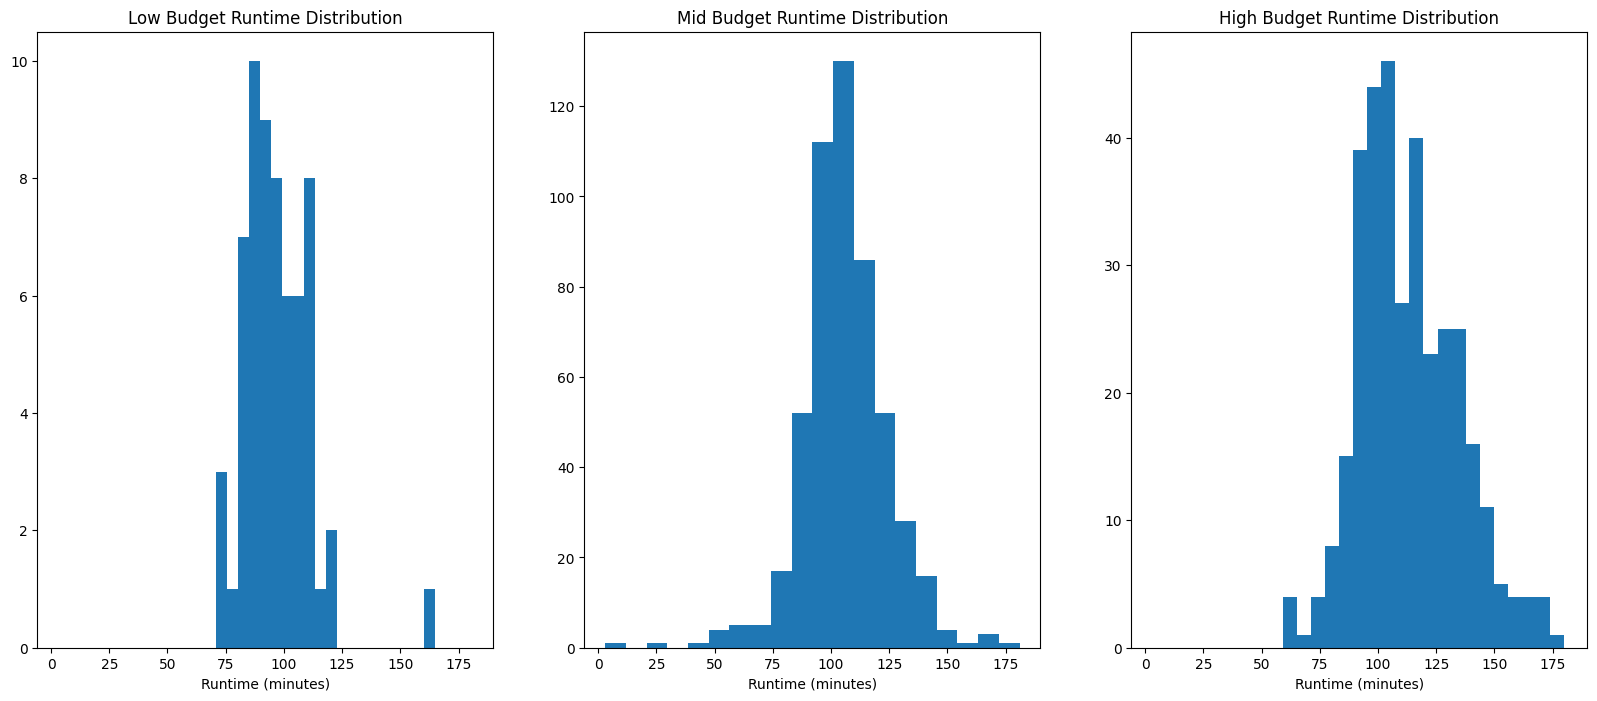

In [12]:
fig, ax = plt.subplots(1,3, figsize = (20,8), sharex = True)

ax[0].hist(low_budget_ratings_moneymaker['runtime_minutes'], bins = 20)


ax[1].hist(mid_budget_ratings_moneymaker['runtime_minutes'],bins = 20)
ax[2].hist(high_budget_ratings_moneymaker['runtime_minutes'],bins = 20)

ax[0].set_title('Low Budget Runtime Distribution')
ax[0].set_xlabel('Runtime (minutes)')
ax[1].set_title('Mid Budget Runtime Distribution')
ax[1].set_xlabel('Runtime (minutes)')
ax[2].set_title('High Budget Runtime Distribution')
ax[2].set_xlabel('Runtime (minutes)')

In [13]:
x_bar = np.mean(low_budget_ratings_moneymaker['runtime_minutes'])
s = np.std(low_budget_ratings_moneymaker['runtime_minutes'], ddof = 1)
se = s/np.sqrt(len(low_budget_ratings_moneymaker['runtime_minutes']))
print('Low Budget Sample mean:', x_bar)
print('Low Budget Sample standard deviation:', s)
print('Low Budget Estimated standard error:', se)
stats.t.interval(confidence = 0.95,                              
                 df= len(low_budget_ratings_moneymaker['runtime_minutes'])-1,             
                 loc = x_bar,                               
                 scale = se)    

Low Budget Sample mean: 96.74193548387096
Low Budget Sample standard deviation: 14.54437583135276
Low Budget Estimated standard error: 1.8324191154484621


(93.0789818663082, 100.40488910143372)

In [14]:
x_bar = np.mean(mid_budget_ratings_moneymaker['runtime_minutes'])
s = np.std(mid_budget_ratings_moneymaker['runtime_minutes'], ddof = 1)
se = s/np.sqrt(len(mid_budget_ratings_moneymaker['runtime_minutes']))
print('Mid Budget Sample mean:', x_bar)
print('Mid Budget Sample standard deviation:', s)
print('Mid Budget Estimated standard error:', se)
stats.t.interval(confidence = 0.95,                              
                 df= len(mid_budget_ratings_moneymaker['runtime_minutes'])-1,             
                 loc = x_bar,                               
                 scale = se)    

Mid Budget Sample mean: 105.67630057803468
Mid Budget Sample standard deviation: 18.327122889098113
Mid Budget Estimated standard error: 0.7983420122265681


(104.10797028891557, 107.2446308671538)

In [15]:
x_bar = np.mean(high_budget_ratings_moneymaker['runtime_minutes'])
s = np.std(high_budget_ratings_moneymaker['runtime_minutes'], ddof = 1)
se = s/np.sqrt(len(high_budget_ratings_moneymaker['runtime_minutes']))
print('High Budget Sample mean:', x_bar)
print('High Budget Sample standard deviation:', s)
print('High Budget Estimated standard error:', se)
stats.t.interval(confidence = 0.95,                              
                 df= len(high_budget_ratings_moneymaker['runtime_minutes'])-1,             
                 loc = x_bar,                               
                 scale = se)    

High Budget Sample mean: 113.0635838150289
High Budget Sample standard deviation: 21.285676013482064
High Budget Estimated standard error: 1.129726382616637


(110.84176461202, 115.28540301803781)

Looking at the three distributions runtimes seem to be more concentrated the smaller the budget and as you go up in category the distribution widens. Although they all seem to be centralized around a similar point the analysis of the mean, standard deviation and standard error as well as the 95% confidence interval reconfirm what is visually aparent. The cheaper the movie the shorter the money making movies tend to be with much less leniance for different run times while as the movies get larger in scale there is more wiggle room for the runtime of a successful movie and movies tend to be longer.

## Language

The next variable we looked at was langauge, specificially how language effected the foreign box office succes of films

In [16]:
median_lowbudget_lang = reg_lang_low_budget.groupby('language').agg(
  median_foreignratio=('foreign_success', 'median'),
  rng=("foreign_success", lambda x: (max(x) - min(x)))).sort_values('median_foreignratio', ascending = False)

median_lowbudget_lang = median_lowbudget_lang.reset_index()

median_lowbudget_lang = median_lowbudget_lang[median_lowbudget_lang['language'].isin(low_budget_language)]
median_lowbudget_lang

,language,median_foreignratio,rng
1,Croatian,9.866667,28.361905
5,English,4.371429,31.566000
6,French,4.250000,201.930000
7,Turkish,3.700000,201.930000
8,Bulgarian,3.650000,48.406667
9,Hebrew,3.562500,48.321250


In [17]:
median_midbudget_lang = reg_lang_mid_budget.groupby('language').agg(
  median_foreignratio=('foreign_success', 'median'),
  rng=("foreign_success", lambda x: (max(x) - min(x)))).sort_values('median_foreignratio', ascending = False)

median_midbudget_lang = median_midbudget_lang.reset_index()

median_midbudget_lang = median_midbudget_lang[median_midbudget_lang['language'].isin(mid_budget_language)]
median_midbudget_lang

,language,median_foreignratio,rng
4,Croatian,2.737679,13.535567
7,Cantonese,2.055000,2.775000
8,Mandarin Chinese,2.055000,30.258947
9,Spanish,1.876000,5.638462
10,Persian,1.711170,9.019286
11,Bosnian,1.696825,8.451000
13,Swedish,1.515000,10.648571
14,Catalan,1.427464,9.491176
15,Hebrew,1.374328,26.582458
16,English,1.331429,26.581359


In [19]:
median_highbudget_lang = reg_lang_high_budget.groupby('language').agg(
  median_foreignratio=('foreign_success', 'median'),
  rng=("foreign_success", lambda x: (max(x) - min(x)))).sort_values('median_foreignratio', ascending = False)
median_highbudget_lang = median_highbudget_lang.reset_index()

median_highbudget_lang = median_highbudget_lang[median_highbudget_lang['language'].isin(high_budget_language)]
median_highbudget_lang

,language,median_foreignratio,rng
4,Persian,2.731250,10.269329
5,Mandarin Chinese,2.613821,4.841333
6,Hindi,2.579456,2.611456
7,Dutch,2.536667,6.363152
8,Serbian,2.440107,11.464069
10,Cantonese,2.315636,3.377273
11,Catalan,2.280000,10.505027
12,English,2.221348,12.494541
16,Bosnian,2.019714,2.788000
19,Croatian,1.776842,3.720712


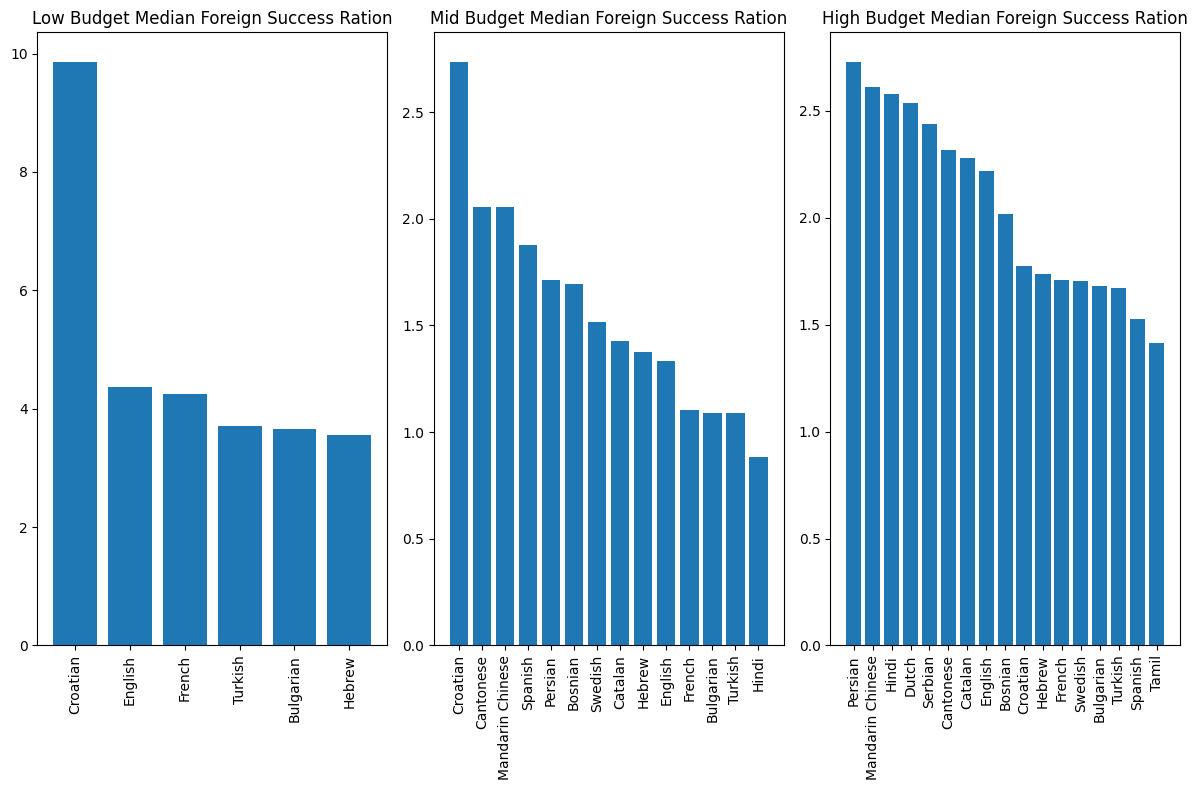

In [21]:
fig, ax = plt.subplots(1,3, figsize = (12,8))

ax[0].bar(median_lowbudget_lang['language'], median_lowbudget_lang['median_foreignratio'])

ax[1].bar(median_midbudget_lang['language'], median_midbudget_lang['median_foreignratio'])

ax[2].bar(median_highbudget_lang['language'], median_highbudget_lang['median_foreignratio'])

ax[1].tick_params(axis='x', rotation=90)
ax[0].tick_params(axis='x', rotation=90)
ax[2].tick_params(axis='x', rotation=90)

ax[0].set_title('Low Budget Median Foreign Success Ration')

ax[1].set_title('Mid Budget Median Foreign Success Ration')

ax[2].set_title('High Budget Median Foreign Success Ration')

fig.tight_layout()

## Genre

The following code creates a count for each genre by budget, a count of money making films from each genre and then a percentage of movies in the genre that made money.

In [15]:
num_low_genres = low_budget_genres['genres'].value_counts()
num_low_genres = num_low_genres.to_frame().reset_index()

low_budget_genres_moneymaking = low_budget_genres[low_budget_genres['WW_success'] > 1]
num_low_budget_genres_moneymaking = low_budget_genres_moneymaking['genres'].value_counts()
num_low_budget_genres_moneymaking = num_low_budget_genres_moneymaking.to_frame().reset_index()
num_low_budget_genres_moneymaking= num_low_budget_genres_moneymaking.rename(columns = {'count':'moneymake_count'})

low_budget_ratio = pd.merge(num_low_genres, num_low_budget_genres_moneymaking, right_on = 'genres', left_on = 'genres', how = 'outer')
low_budget_ratio = low_budget_ratio.fillna(0)

low_budget_ratio['percentage_moneymaking'] = (low_budget_ratio['moneymake_count']/low_budget_ratio['count'])*100
low_budget_ratio.sort_values(by = 'percentage_moneymaking', ascending = False)

,genres,count,moneymake_count,percentage_moneymaking
10,Fantasy,5,5.0,100.000000
12,Music,3,3.0,100.000000
13,Biography,2,2.0,100.000000
14,Family,1,1.0,100.000000
5,Mystery,14,13.0,92.857143
2,Horror,24,22.0,91.666667
4,Romance,15,13.0,86.666667
8,Sci-Fi,6,5.0,83.333333
0,Drama,46,36.0,78.260870
1,Thriller,26,20.0,76.923077


In [33]:
num_mid_genres = mid_budget_genres['genres'].value_counts()
num_mid_genres = num_mid_genres.to_frame().reset_index()

mid_budget_genres_moneymaking = mid_budget_genres[mid_budget_genres['WW_success'] > 1]
num_mid_budget_genres_moneymaking = mid_budget_genres_moneymaking['genres'].value_counts()
num_mid_budget_genres_moneymaking = num_mid_budget_genres_moneymaking.to_frame().reset_index()
num_mid_budget_genres_moneymaking= num_mid_budget_genres_moneymaking.rename(columns = {'count':'moneymake_count'})

mid_budget_ratio = pd.merge(num_mid_genres, num_mid_budget_genres_moneymaking, right_on = 'genres', left_on = 'genres', how = 'outer')
mid_budget_ratio = mid_budget_ratio.fillna(0)

mid_budget_ratio['percentage_moneymaking'] = (mid_budget_ratio['moneymake_count']/mid_budget_ratio['count']) * 100
mid_budget_ratio.sort_values(by = 'percentage_moneymaking', ascending = False)

,genres,count,moneymake_count,percentage_moneymaking
21,News,1,1,100.000000
20,Musical,1,1,100.000000
11,Family,33,30,90.909091
1,Comedy,226,194,85.840708
8,Horror,67,57,85.074627
5,Romance,108,91,84.259259
9,Mystery,55,46,83.636364
13,History,28,23,82.142857
15,Documentary,21,17,80.952381
4,Thriller,115,93,80.869565


In [34]:
num_high_genres = high_budget_genres['genres'].value_counts()
num_high_genres = num_high_genres.to_frame().reset_index()

high_budget_genres_moneymaking = high_budget_genres[high_budget_genres['WW_success'] > 1]
num_high_budget_genres_moneymaking = high_budget_genres_moneymaking['genres'].value_counts()
num_high_budget_genres_moneymaking = num_high_budget_genres_moneymaking.to_frame().reset_index()
num_high_budget_genres_moneymaking= num_high_budget_genres_moneymaking.rename(columns = {'count':'moneymake_count'})

high_budget_ratio = pd.merge(num_high_genres, num_high_budget_genres_moneymaking, right_on = 'genres', left_on = 'genres', how = 'outer')
high_budget_ratio = high_budget_ratio.fillna(0)

high_budget_ratio['percentage_moneymaking'] = (high_budget_ratio['moneymake_count']/high_budget_ratio['count']) * 100
high_budget_ratio.sort_values(by = 'percentage_moneymaking', ascending = False)

,genres,count,moneymake_count,percentage_moneymaking
20,War,1,1,100.000000
11,Romance,14,14,100.000000
19,Music,2,2,100.000000
14,Documentary,11,11,100.000000
13,Mystery,14,14,100.000000
4,Animation,73,72,98.630137
5,Sci-Fi,59,58,98.305085
2,Comedy,117,113,96.581197
0,Adventure,217,204,94.009217
9,Family,31,29,93.548387


## Personel

In [5]:
#code showing analysis

# Recommendation 1

# Recommendation 2

# Recommendation 3